In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19, InceptionV3, ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# dataset link:https://www.kaggle.com/datasets/hanselliott/toxic-plant-classification
# This code snippet appears to be a comment and doesn't have any syntax errors.

In [ ]:
!pip install kaggle

In [ ]:
%env KAGGLE_CONFIG_DIR=<path-to-kaggle-json-folder>

env: KAGGLE_CONFIG_DIR=<path-to-kaggle-json-folder>


In [ ]:
!kaggle datasets download -d hanselliott/toxic-plant-classification

Dataset URL: https://www.kaggle.com/datasets/hanselliott/toxic-plant-classification
License(s): CC0-1.0
 99% 451M/457M [00:06<00:00, 81.0MB/s]
100% 457M/457M [00:06<00:00, 71.8MB/s]


In [ ]:
import zipfile
import os


# Check if the file exists with a slightly different name due to Kaggle download
if os.path.exists('toxic-plant-classification.zip'):
    dataset_zip = 'toxic-plant-classification.zip'
else:
    dataset_zip = './new-plant-classification-dataset.zip' # Keep the original name if the above doesn't exist

extract_dir = './plant_classification_dataset/'

# Create the directory if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Extract the zip file
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [ ]:
import zipfile
import os
import glob

# Use glob to find zip files matching the pattern
dataset_zip = glob.glob('*plant*classification*.zip')[0]

extract_dir = './plant_classification_dataset/'

# Create the directory if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Extract the zip file
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [ ]:
!unzip -o toxic-plant-classification.zip -d ./plant_classification_dataset/

Streaming output truncated to the last 5000 lines.
  inflating: ./plant_classification_dataset/tpc-imgs/nontoxic_images/004/954.jpg  
  inflating: ./plant_classification_dataset/tpc-imgs/nontoxic_images/004/955.jpg  
  inflating: ./plant_classification_dataset/tpc-imgs/nontoxic_images/004/956.jpg  
  inflating: ./plant_classification_dataset/tpc-imgs/nontoxic_images/004/957.jpg  
  inflating: ./plant_classification_dataset/tpc-imgs/nontoxic_images/004/958.jpg  
  inflating: ./plant_classification_dataset/tpc-imgs/nontoxic_images/004/959.jpg  
  inflating: ./plant_classification_dataset/tpc-imgs/nontoxic_images/004/960.jpg  
  inflating: ./plant_classification_dataset/tpc-imgs/nontoxic_images/004/961.jpg  
  inflating: ./plant_classification_dataset/tpc-imgs/nontoxic_images/004/962.jpg  
  inflating: ./plant_classification_dataset/tpc-imgs/nontoxic_images/004/963.jpg  
  inflating: ./plant_classification_dataset/tpc-imgs/nontoxic_images/004/964.jpg  
  inflating: ./plant_classification_

In [ ]:
import os

directories = os.listdir('./plant_classification_dataset/')
for directory in directories:
    print(directory)

tpc-imgs


In [ ]:
dataset_dir="/content/plant_classification_dataset/tpc-imgs"

In [ ]:
# Set up parameters
IMAGE_SIZE = (224, 224)  # Image size required by most models
BATCH_SIZE = 32
EPOCHS = 10  # Adjust epochs based on performance and dataset size
LEARNING_RATE = 1e-4

In [ ]:
# Data directories
train_dir = "/content/plant_classification_dataset/tpc-imgs"  # Replace with your train dataset directory
validation_dir = "/content/plant_classification_dataset/tpc-imgs"  # Replace with your validation dataset directory

In [ ]:
# Data augmentation and loading
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=IMAGE_SIZE,
                                                    batch_size=BATCH_SIZE, class_mode='binary')
validation_generator = val_datagen.flow_from_directory(validation_dir, target_size=IMAGE_SIZE,
                                                       batch_size=BATCH_SIZE, class_mode='binary')


Found 9952 images belonging to 2 classes.
Found 9952 images belonging to 2 classes.


In [ ]:
# Function to build the model with specified base architecture
def build_model(base_model):
    base_model.trainable = False  # Freeze the base model layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# Choose and build the model (example with VGG16, can change to VGG19, InceptionV3, ResNet50, etc.)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(*IMAGE_SIZE, 3))
model = build_model(base_model)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train_generator,
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stopping])


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


311/311 ━━━━━━━━━━━━━━━━━━━━ 220s 646ms/step - accuracy: 0.5548 - loss: 0.6796 - val_accuracy: 0.6348 - val_loss: 0.6383
Epoch 2/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 238s 618ms/step - accuracy: 0.6301 - loss: 0.6430 - val_accuracy: 0.6547 - val_loss: 0.6224
Epoch 3/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 195s 617ms/step - accuracy: 0.6440 - loss: 0.6313 - val_accuracy: 0.6617 - val_loss: 0.6114
Epoch 4/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 201s 618ms/step - accuracy: 0.6414 - loss: 0.6290 - val_accuracy: 0.6715 - val_loss: 0.6040
Epoch 5/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 197s 621ms/step - accuracy: 0.6441 - loss: 0.6263 - val_accuracy: 0.6576 - val_loss: 0.6149
Epoch 6/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 240s 746ms/step - accuracy: 0.6590 - loss: 0.6151 - val_accuracy: 0.6762 - val_loss: 0.5939
Epoch 7/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 226s 629ms/step - accuracy: 0.6546 - loss: 0.6142 - val_accuracy: 0.6840 - val_loss: 0.5896
Epoch 8/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 197s 623ms/step - accuracy: 0.6699 - loss: 0.60

In [ ]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

311/311 ━━━━━━━━━━━━━━━━━━━━ 45s 145ms/step - accuracy: 0.6778 - loss: 0.5936
Validation Accuracy: 67.46%


In [ ]:
# Unfreeze some layers for fine-tuning (optional for further accuracy improvement)
for layer in base_model.layers[-10:]:  # Unfreezing the last few layers
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=LEARNING_RATE/10),  # Lower learning rate for fine-tuning
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fine-tuning
fine_tune_history = model.fit(train_generator,
                              epochs=EPOCHS,
                              validation_data=validation_generator,
                              callbacks=[early_stopping])


Epoch 1/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 237s 693ms/step - accuracy: 0.6578 - loss: 0.6098 - val_accuracy: 0.7683 - val_loss: 0.4789
Epoch 2/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 217s 687ms/step - accuracy: 0.7333 - loss: 0.5151 - val_accuracy: 0.7581 - val_loss: 0.4775
Epoch 3/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 219s 695ms/step - accuracy: 0.7741 - loss: 0.4625 - val_accuracy: 0.8189 - val_loss: 0.3855
Epoch 4/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 217s 687ms/step - accuracy: 0.8007 - loss: 0.4207 - val_accuracy: 0.7968 - val_loss: 0.4636
Epoch 5/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 267s 701ms/step - accuracy: 0.8085 - loss: 0.4034 - val_accuracy: 0.8493 - val_loss: 0.3334
Epoch 6/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 219s 697ms/step - accuracy: 0.8266 - loss: 0.3713 - val_accuracy: 0.8681 - val_loss: 0.2949
Epoch 7/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 257s 812ms/step - accuracy: 0.8324 - loss: 0.3541 - val_accuracy: 0.8806 - val_loss: 0.2776
Epoch 8/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 219s 694ms/step - accuracy: 0.8494 -

In [ ]:
# Final evaluation
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Final Validation Accuracy after Fine-Tuning: {val_accuracy * 100:.2f}%")

311/311 ━━━━━━━━━━━━━━━━━━━━ 50s 158ms/step - accuracy: 0.8836 - loss: 0.2566
Final Validation Accuracy after Fine-Tuning: 88.94%


In [ ]:
# Import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Set up test data directory and image size
test_dir = '/content/plant_classification_dataset/tpc-imgs'  # Replace with your actual test dataset directory
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
# Load the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # Important for consistent evaluation
)

Found 9952 images belonging to 2 classes.


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


311/311 ━━━━━━━━━━━━━━━━━━━━ 45s 145ms/step - accuracy: 0.9039 - loss: 0.2228
Test Accuracy: 88.94%


In [ ]:
# Generate predictions
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype("int32")  # Converts to binary classes (0 or 1)


311/311 ━━━━━━━━━━━━━━━━━━━━ 45s 142ms/step


In [ ]:
# Classification Report
true_classes = test_generator.classes  # True labels
class_labels = list(test_generator.class_indices.keys())  # Class labels
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))



Classification Report:
                 precision    recall  f1-score   support

nontoxic_images       0.89      0.89      0.89      4999
   toxic_images       0.89      0.88      0.89      4953

       accuracy                           0.89      9952
      macro avg       0.89      0.89      0.89      9952
   weighted avg       0.89      0.89      0.89      9952



311/311 ━━━━━━━━━━━━━━━━━━━━ 46s 146ms/step


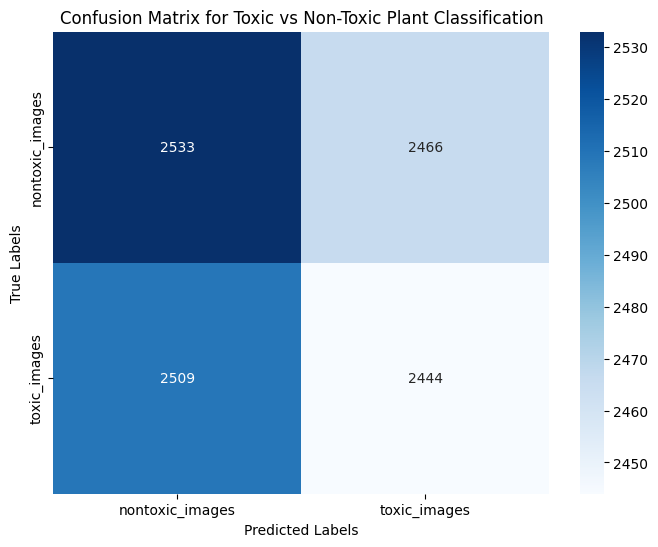

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict labels for the validation data
validation_generator.reset()  # Reset validation generator to avoid shuffling issues
predictions = model.predict(validation_generator)
predicted_labels = (predictions > 0.5).astype(int).ravel()  # Convert probabilities to binary labels

# Get true labels
true_labels = validation_generator.classes

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
class_names = list(validation_generator.class_indices.keys())  # ['toxic', 'non-toxic']

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Toxic vs Non-Toxic Plant Classification')
plt.show()


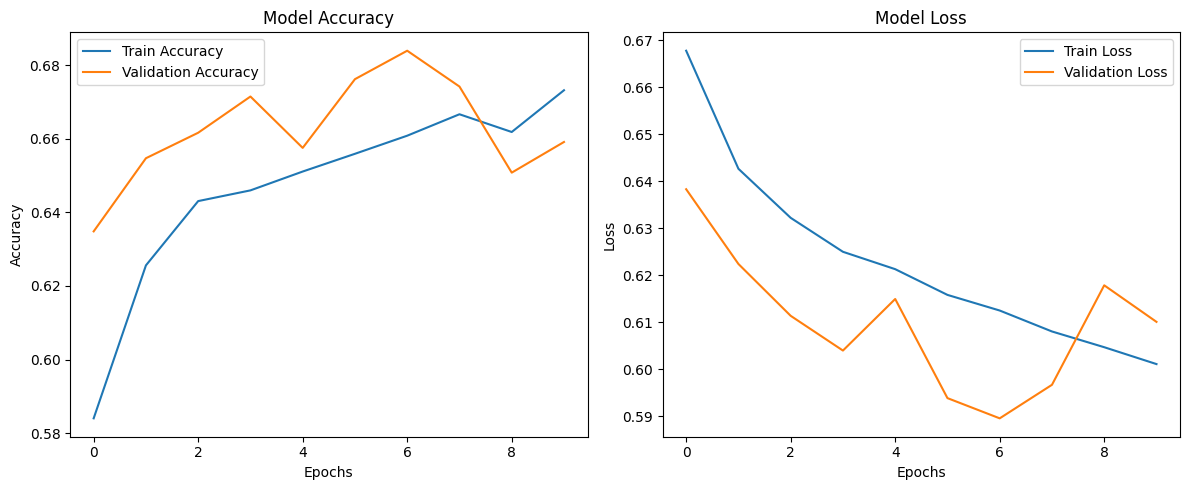

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(loc='best')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


311/311 ━━━━━━━━━━━━━━━━━━━━ 51s 163ms/step


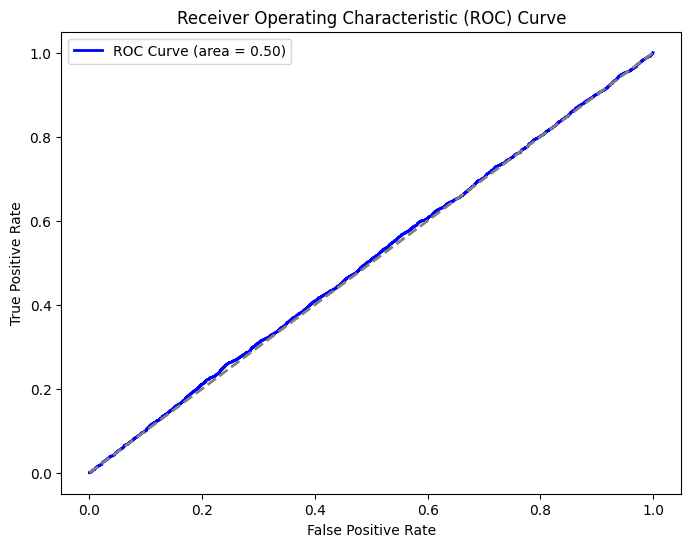

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_pred_prob = model.predict(validation_generator).ravel()

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(true_labels, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()


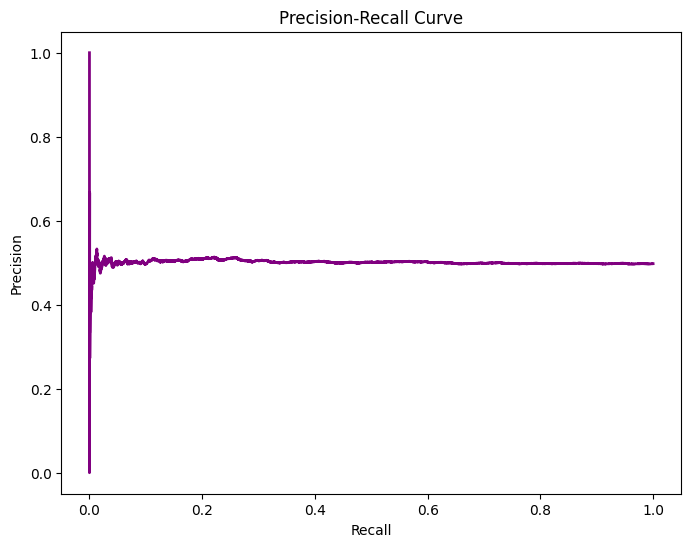

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(true_labels, y_pred_prob)

# Plotting the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


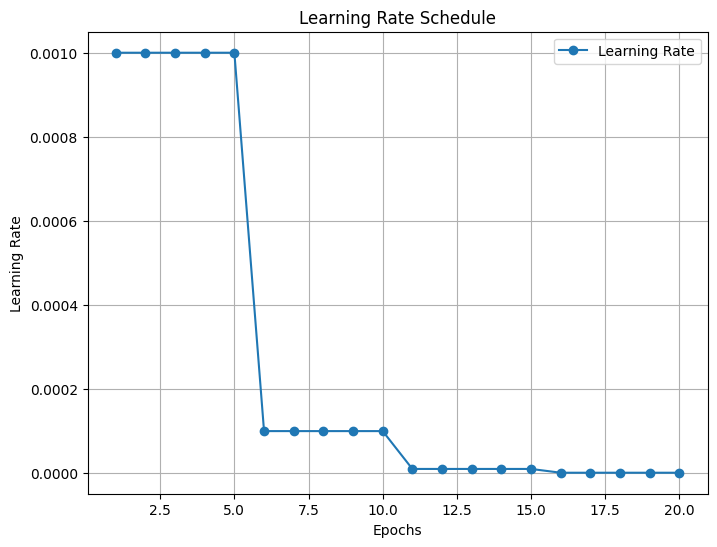

In [ ]:
import matplotlib.pyplot as plt

# Simulating learning rate values over 20 epochs
epochs = list(range(1, 21))
learning_rates = [1e-3] * 5 + [1e-4] * 5 + [1e-5] * 5 + [1e-6] * 5  # Example schedule

# Plotting the learning rate schedule
plt.figure(figsize=(8, 6))
plt.plot(epochs, learning_rates, marker='o', label='Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))


Confusion Matrix:
[[4470  529]
 [ 572 4381]]


311/311 ━━━━━━━━━━━━━━━━━━━━ 43s 139ms/step


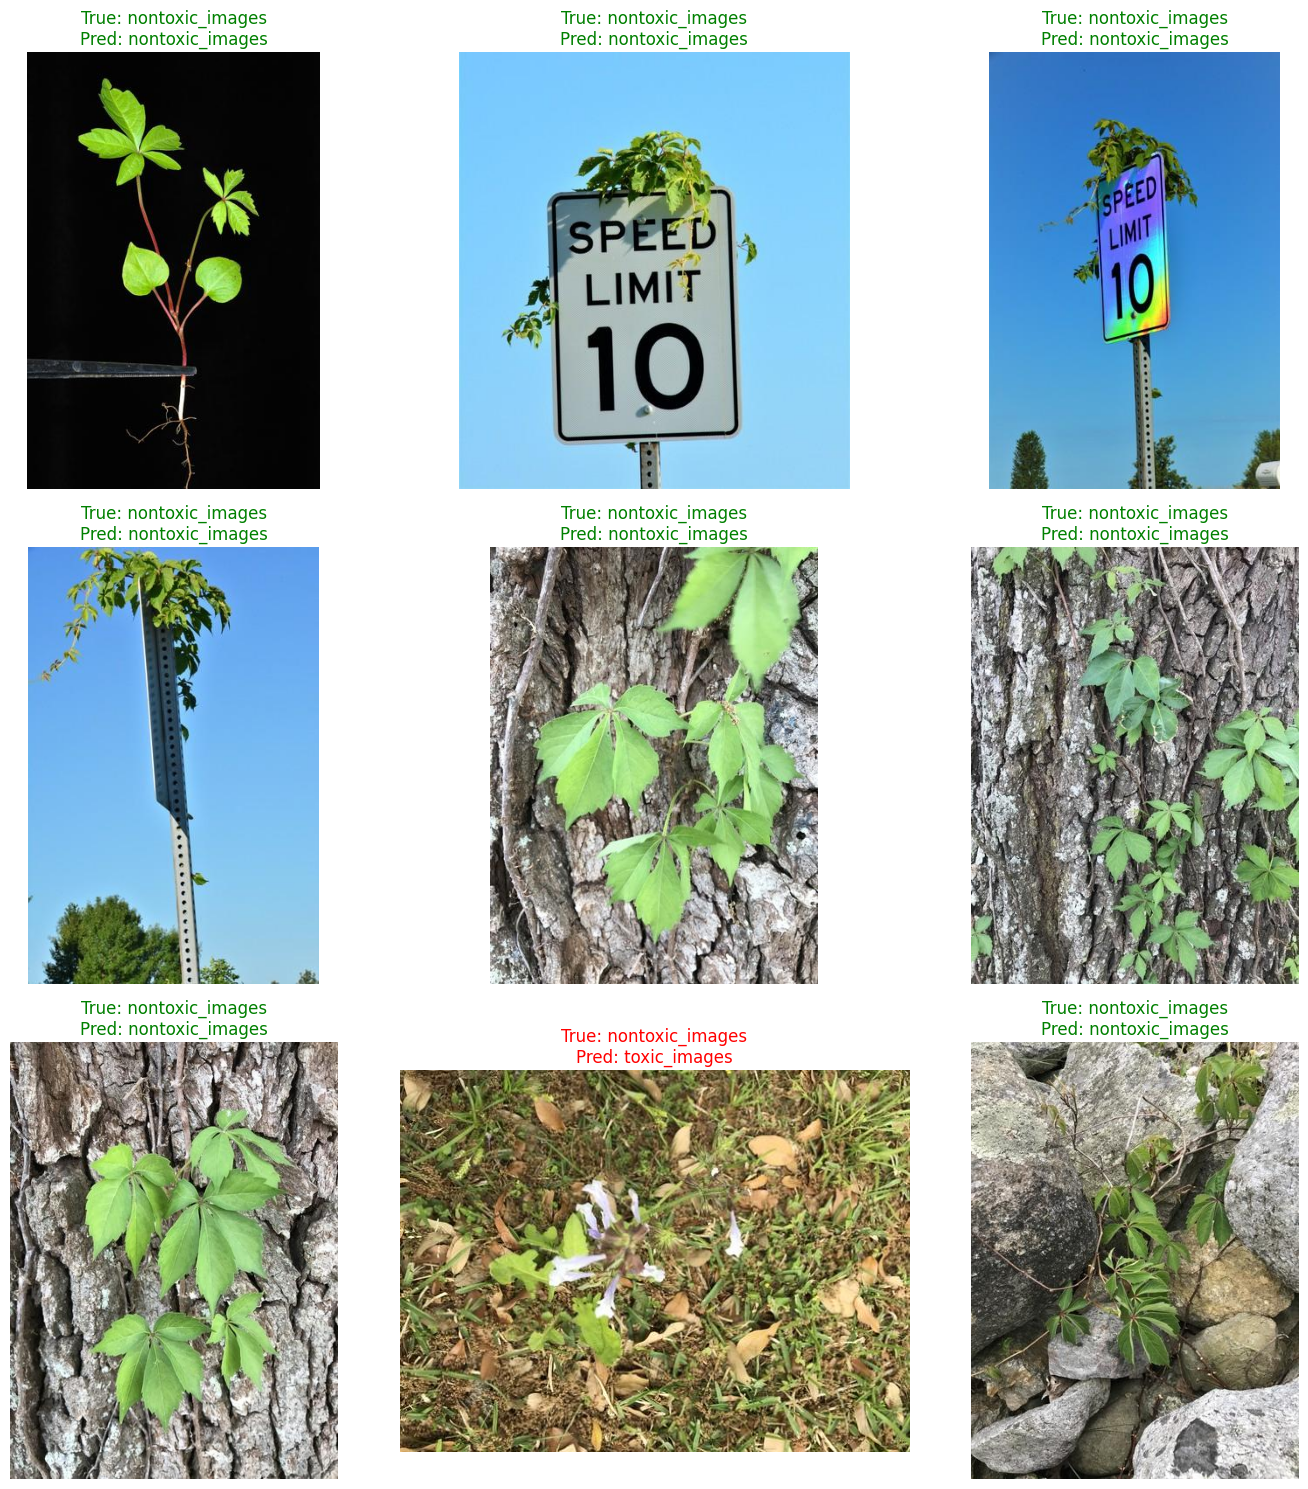

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Retrieve filenames of the test images
filenames = test_generator.filenames
class_labels = list(test_generator.class_indices.keys())  # Class labels: ['non-toxic', 'toxic']

# Generate predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype("int32")  # Converts probabilities to binary classes

# Function to plot test images with predictions
def plot_test_images_with_predictions(test_generator, predicted_classes, true_classes, class_labels, num_images=9):
    # Plotting
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)

        # Load and display the image
        img_path = os.path.join(test_dir, filenames[i])
        img = plt.imread(img_path)
        plt.imshow(img)

        # Actual and predicted labels
        true_label = class_labels[true_classes[i]]
        predicted_label = class_labels[predicted_classes[i][0]]

        # Title with prediction result
        title_color = 'green' if true_label == predicted_label else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=title_color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function with test data
true_classes = test_generator.classes  # Ground truth labels
plot_test_images_with_predictions(test_generator, predicted_classes, true_classes, class_labels)
